## 파이토치 pytorch 에 대해서 알아보자.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch  # pytorch 사용

### pytorch 튜토리얼

In [2]:
torch.__version__

'1.12.1'

In [12]:
# torch 지정 방법
t1 =torch.tensor([1,2,3])
t2 = torch.tensor([1,2,3], dtype=torch.int32)
t3 = torch.tensor([1,2,3], device='cpu')
print(t1)
print(t2)
print(t3)

tensor([1, 2, 3])
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [7]:
# type, shape, device, dtype 알아보자
type(t1), t1.shape, t1.device, t1.dtype

(torch.Tensor, torch.Size([3]), device(type='cpu'), torch.int64)

In [14]:
t3 = torch.tensor([[1,2,3], [3,4,5]])
type(t3), t3.shape, t3.device, t3.dtype

(torch.Tensor, torch.Size([2, 3]), device(type='cpu'), torch.int64)

In [18]:
# numpy.ndarray도 대입 가능, pd.DataFrame은 대입 불가능
t3 = torch.tensor(np.array([[1,2,3], [3,4,5]]))
t3

tensor([[1, 2, 3],
        [3, 4, 5]], dtype=torch.int32)

In [33]:
# ones, ones_like, zeros, zeros_like, rand, rand_like 실습
print(torch.ones(4))
print(torch.ones((9,3)))
print(torch.zeros(7))
print(torch.ones_like(torch.zeros(4)))
print(torch.zeros_like(torch.ones(4)))
print(torch.rand_like(torch.ones(4)))

tensor([1., 1., 1., 1.])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([0., 0., 0., 0., 0., 0., 0.])
tensor([1., 1., 1., 1.])
tensor([0., 0., 0., 0.])
tensor([0.2933, 0.6013, 0.0421, 0.0816])


### gpu로 옮기는 작업
- if torch.cuda.is_available():  
    tensor = tensor.to("cuda") 사용

In [71]:
# 대량의 데이터를 빨리 처리할 때 좋음
tensor = torch.ones(4)
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
torch.cuda.is_available()

False

### torch indexing & slicing
- numpy.ndarray, pd.DataFrame과 유사

In [45]:
print(t3)
print(t3[0,1])
print(t3[:,0])
print(t3[1])
print(t3[1,:])
print(t3[:,:])
print(t3[:,1:3])
print(t3)

tensor([[1, 2, 3],
        [3, 4, 5]], dtype=torch.int32)
tensor(2, dtype=torch.int32)
tensor([1, 3], dtype=torch.int32)
tensor([3, 4, 5], dtype=torch.int32)
tensor([3, 4, 5], dtype=torch.int32)
tensor([[1, 2, 3],
        [3, 4, 5]], dtype=torch.int32)
tensor([[2, 3],
        [4, 5]], dtype=torch.int32)


### pytorch 텐서 합치기, 계산
- concat, stack
- T(전치행렬), matmul(행렬곱)
- sum(), min(), max(), argmax(), argmin()
- mul(int), add(int)
- numpy()  : tensor -> numpy


In [52]:
t1 = torch.tensor([[2,3], [4,5]])
t2 = torch.tensor([[1,2], [-2,-4]])
torch.concat([t1,t2])

tensor([[ 2,  3],
        [ 4,  5],
        [ 1,  2],
        [-2, -4]])

In [48]:
t1 = torch.tensor([[2,3], [4,5]])
t2 = torch.tensor([[1,2], [-2,-4]])
print(t1 * t2)
print(t1.matmul(t2))

tensor([[  2,   6],
        [ -8, -20]])
tensor([[ -4,  -8],
        [ -6, -12]])


In [53]:
print(t1.sum())
print(t1.sum().item())
print(t1.argmax())

tensor(14)
14
tensor(3)


In [65]:
print(t1.mul(2))
print(t1.add(4))
print(t1.numpy())

tensor([[ 4,  6],
        [ 8, 10]])
tensor([[6, 7],
        [8, 9]])
[[2 3]
 [4 5]]


In [69]:
# requires_grad : 자동 미분을 설정, .grad 속성으로 노드에 대한 gradient 참조 
t1 = torch.ones(2,2,requires_grad=True) 
print(t1)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [72]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



### pytorch 실습

In [73]:
# 모듈 로딩
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [74]:
# 학습 장치 얻기
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


### 클래스 정의
- 신경망 모델을 nn.Module의 하위 클래스로 정의하고, __init__에서 신경망 계층을 초기화
- nn.Module을 상속받은 모든 클래스는 forward 메소드에 입력 데이터에 대한 연산 구현

In [76]:
# 순차적인 Layer 구성 -> Sequential, Layer, ...
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # 1차원으로 데이터 변환
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # 입력층
            nn.Linear(28*28, 512),
            nn.ReLU(),
            # 은닉층
            nn.Linear(512, 512),
            nn.ReLU(),
            # 출력층
            nn.Linear(512, 10),
        )
    # nn 모델이 동작을 시작할 때 실행
    def forward(self, x):
        # 1차원으로 데이터 변환
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [80]:
# neural network 모델 생성
md = NeuralNetwork()
md.flatten
md.linear_relu_stack

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)

In [81]:
# 모델 생성
md = NeuralNetwork().to(device)
print(md)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### 모델 호출
- model.forward() 메서드를 직접 호출할 필요가 없다.
- model에 직접 입력 데이터를 전달하면 됨 (일부 백그라운드 연산과 함께 알아서 forward 메서드 계산되기 때문)
- 반환된 model에 softmax 모듈을 취하면 예측 확률을 얻을 수 있음

In [86]:
# 데이터 준비
X = torch.rand(1, 28, 28, device=device)
print(X)

tensor([[[0.6768, 0.0920, 0.8511, 0.3596, 0.7733, 0.0966, 0.4309, 0.6342,
          0.6312, 0.7292, 0.7212, 0.5351, 0.5522, 0.6845, 0.1473, 0.3875,
          0.6989, 0.1366, 0.1626, 0.0250, 0.5802, 0.5472, 0.8090, 0.3898,
          0.1966, 0.2783, 0.3726, 0.1300],
         [0.8304, 0.6562, 0.1014, 0.8782, 0.1262, 0.3147, 0.5987, 0.0603,
          0.9875, 0.0797, 0.6704, 0.5917, 0.9134, 0.6809, 0.0932, 0.9630,
          0.4025, 0.6038, 0.8486, 0.1091, 0.9975, 0.2589, 0.9936, 0.5837,
          0.6525, 0.7234, 0.5145, 0.0922],
         [0.1225, 0.1392, 0.7630, 0.7875, 0.0812, 0.5197, 0.5381, 0.1521,
          0.3275, 0.0914, 0.9065, 0.3504, 0.0602, 0.5994, 0.0306, 0.2262,
          0.2701, 0.7889, 0.4804, 0.8046, 0.3220, 0.0549, 0.7223, 0.2802,
          0.1117, 0.1005, 0.0680, 0.6579],
         [0.2806, 0.4658, 0.8483, 0.2735, 0.3661, 0.1374, 0.5585, 0.2562,
          0.5400, 0.8234, 0.1401, 0.0570, 0.5553, 0.2511, 0.3245, 0.0079,
          0.4897, 0.6727, 0.0029, 0.4670, 0.1757, 0.9305,

In [87]:
logits = md(X)
pred_probab = nn.Softmax(dim=1)(logits)
print(f"pred_probab: {pred_probab}")
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

pred_probab: tensor([[0.0953, 0.1016, 0.0941, 0.0985, 0.1050, 0.0971, 0.0943, 0.1033, 0.1075,
         0.1033]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([8])


In [93]:
print(training_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


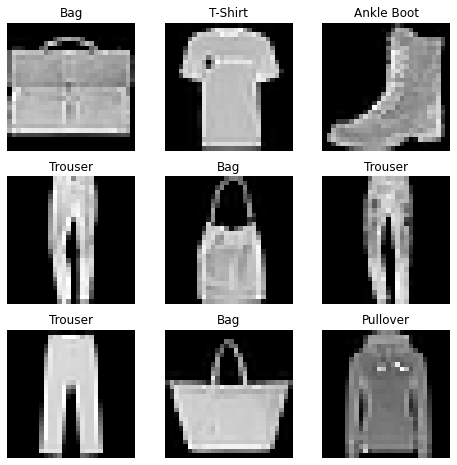

In [98]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") 
    # squeeze : 텐서 안의 1차원인 항을 제거 -> 3차원이 2차원으로 바뀜
    # unsqueeze : squeeze의 반대 역할, 1차원 항 추가
plt.show()